In [13]:
%matplotlib inline

# Take care of all our import statements first
import matplotlib.pyplot as plt
import numpy




In [14]:
# Example 2: pull out the gene features, ignore all others
fh = open('s _meliloti.gff3', 'r')
genelengths = list()
fh = open('s _meliloti.gff3', 'r')
for line in fh:
    if '\tgene\t' in line:
        values = line.split('\t')
        start = int(values[3])
        end = int(values[4])
        start1 = []
        end1 = []
        start1.append(values[3])
        end1.append(values[4])
        genelength = end - start + 1
        genelengths.append(genelength)



In [15]:
def parse_fasta(data):
    """
    Read DNA, RNA, or protein sequences in Fasta format.

    This generator function yields a tuple containing a defline and a sequence
    for each record in the Fasta data. Stolen shamelessly from
    http://stackoverflow.com/a/7655072/459780.
    """
    name, seq = None, []
    for line in data:
        line = line.rstrip()
        if line.startswith(">"):
            if name: yield (name, ''.join(seq))
            name, seq = line, []
        else:
            seq.append(line)
    if name: yield (name, ''.join(seq))
chromo = ""
plB =""
plA =""

for defline, sequence in parse_fasta(open('s_meliloti.faa', 'r')):
    if defline.startswith('>pSymB'):
        plB = sequence
    elif defline.startswith('>pSymA'):
        plA = sequence
    elif defline.startswith('>C'):
        chromo = sequence
        
full = chromo + plA + plB
print len(chromo)
print len(plA)
print len(plB)


3654135
1354226
1683333


In [18]:



gccontent = []
gccount = 0.0
i = 0
j = 0
fh = open('s _meliloti.gff3', 'r')
for line in fh:
    if '\tgene\t' in line:
        values = line.split('\t')
        start = int(values[3])
        end = int(values[4])
        sub = full[start: (end+1)]
        genelength = end - start + 1
        gccount = sub.count('C') + sub.count('G')
        gccontent.append(float(gccount)/genelength)

print gccontent
print genelengths

    # print 'This is a defline:      %s' % defline
    # print 'This is the seqid:      %s' % defline[1:].split()[0]
    # print 'First 50 nucleotides:   %s' % sequence[0:50]

[0.6131386861313869, 0.615, 0.6213704994192799, 0.6444444444444445, 0.6337448559670782, 0.6272189349112426, 0.6527777777777778, 0.5883190883190883, 0.6550491510277033, 0.671957671957672, 0.6190476190476191, 0.6346469622331691, 0.644891122278057, 0.6487972508591066, 0.6190476190476191, 0.66167290886392, 0.6245733788395904, 0.6699867197875166, 0.6480392156862745, 0.6373737373737374, 0.6396396396396397, 0.637948717948718, 0.6764995083579154, 0.6266666666666667, 0.6009389671361502, 0.6455026455026455, 0.6280864197530864, 0.6281736281736282, 0.6678571428571428, 0.6262295081967213, 0.6666666666666666, 0.615979381443299, 0.5987654320987654, 0.6705882352941176, 0.6754716981132075, 0.644808743169399, 0.6356435643564357, 0.6436920596533656, 0.6302640970735189, 0.6494845360824743, 0.6019900497512438, 0.6666666666666666, 0.651565995525727, 0.6376210235131397, 0.6480446927374302, 0.6574712643678161, 0.6181434599156118, 0.6763285024154589, 0.6184738955823293, 0.6234567901234568, 0.6499356499356499, 

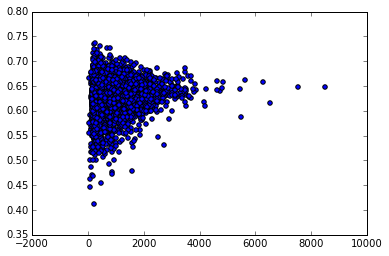

In [17]:
plot = plt.scatter(genelengths, gccontent)